# GraphViz Chain

In this notebook, we construct a graph of a chain of models.

## Preliminaries

In [1]:
import os
import sys
import networkx as nx

from os.path import dirname

note_dir = os.getcwd()

root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus.tests import default_chain
from morpheus.graph import (add_positions,
                            model_to_graph,
                            model_graph_traces,
                            model_graph_layout, 
                            convert_positions_to_dot_format)

## Build Chain

In [2]:
chain = default_chain()


        Learning model with desc ids:    [0, 1, 2]
                            targ ids:    [4, 5]
        

        Learning model with desc ids:    [1, 2, 5]
                            targ ids:    [7]
        

            Trying to add a model to end of the chain.
            
            Current chain targ_ids:     [4. 5.]
            New estimator desc_ids:     [1, 2, 5]
            


            Connecting attributes:  [5.]
            



In [3]:
chain.pretty_print()


        # Main
        Descriptive attributes:     [0. 1. 2.]
        Target attributes:          [4. 7.]

        ## On types (mostly nominals)
        Target attribute types:                     ['numeric', 'nominal']
        N_classes of nominal target attributes:     [2]
        Classes of nominal target attributes:       [array([0., 1.])]

        ## Weights
        Total weights of target attributes:         [1. 1.]

         
        ## Estimators
        Estimators used:        ['RandomForestRegressor', 'RandomForestClassifier']
        N_estimators:           2
        


## Build Graph

In [4]:
model_one = chain.estimators_[0]
model_two = chain.estimators_[1]

In [5]:
G_one = model_to_graph(model_one, idx=1)
G_two = model_to_graph(model_two, idx=2)
G_three = model_to_graph(model_two, idx=3)

In [6]:
G_chain = nx.compose(G_one, G_two)

In [7]:
G_chain = nx.compose(G_chain, G_three)

In [8]:
for n in G_chain.nodes():
    if G_chain.nodes()[n]['bipartite'] == 'func':
        G_chain.nodes()[n]['shape'] = "\"square\""
        G_chain.nodes()[n]['width'] = "2"
    else:
        G_chain.nodes()[n]['shape'] = "\"circle\""

In [9]:
for e in G_chain.edges():
    G_chain.edges()[e]["xlabel"] = G_chain.edges()[e]["idx"]

In [10]:
list(G_chain.nodes)

['d-0000',
 'd-0001',
 'd-0002',
 'd-0004',
 'd-0005',
 'f-0001',
 'd-0007',
 'f-0002',
 'f-0003']

In [11]:
node = G_chain.nodes()['d-0005']
node

{'bipartite': 'data', 'idx': 5, 'shape': '"circle"'}

In [12]:
G_chain.nodes(data=True)

NodeDataView({'d-0000': {'bipartite': 'data', 'idx': 0, 'shape': '"circle"'}, 'd-0001': {'bipartite': 'data', 'idx': 1, 'shape': '"circle"'}, 'd-0002': {'bipartite': 'data', 'idx': 2, 'shape': '"circle"'}, 'd-0004': {'bipartite': 'data', 'idx': 4, 'shape': '"circle"'}, 'd-0005': {'bipartite': 'data', 'idx': 5, 'shape': '"circle"'}, 'f-0001': {'bipartite': 'func', 'idx': 1, 'mod': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 'shape': '"square"', 'width': '2'}, 'd-0007': {'bipartite': 'data', 'idx': 7, 'shape': '"circle"'}, 'f-0002': {'bipartite': 'func', 'idx': 2, 'mod': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
         

In [13]:
new_node=("copy", node)
new_node

('copy', {'bipartite': 'data', 'idx': 5, 'shape': '"circle"'})

In [14]:
G_chain.add_node(new_node[0], **new_node[1])

In [ ]:
G_chain.nodes()[] 


## Build graph from chain

Now,we try to combine.

In [15]:
from networkx.drawing.nx_pydot import to_pydot

In [16]:
X = to_pydot(G_chain)

In [17]:

X.set('splines', 'ortho')

In [18]:
#X.set('nodesep', 1)
X.set('ranksep', 2)
X.set('rankdir', 'BT')

In [19]:
X.get_nodesep()

In [24]:
print(X.to_string())

strict digraph  {
rankdir=BT;
ranksep=2;
splines=ortho;
"d-0000" [bipartite=data, idx=0, shape="circle"];
"d-0001" [bipartite=data, idx=1, shape="circle"];
"d-0002" [bipartite=data, idx=2, shape="circle"];
"d-0004" [bipartite=data, idx=4, shape="circle"];
"d-0005" [bipartite=data, idx=5, shape="circle"];
"f-0001" [bipartite=func, idx=1, mod="RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,\n           max_features='auto', max_leaf_nodes=None,\n           min_impurity_decrease=0.0, min_impurity_split=None,\n           min_samples_leaf=1, min_samples_split=2,\n           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,\n           oob_score=False, random_state=None, verbose=0, warm_start=False)", shape="square", width=2];
"d-0007" [bipartite=data, idx=7, shape="circle"];
"f-0002" [bipartite=func, idx=2, mod="RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',\n            max_depth=5, max_features='auto', max_leaf_nodes=None,\n        

In [21]:
with open("test.dot", "w") as text_file:
    print(X.to_string(), file=text_file)
    
!dot -T png test.dot > test.png  # Bash command

from IPython.display import Image, display
from IPython.core.display import HTML 

display(Image('test.png', unconfined=True))

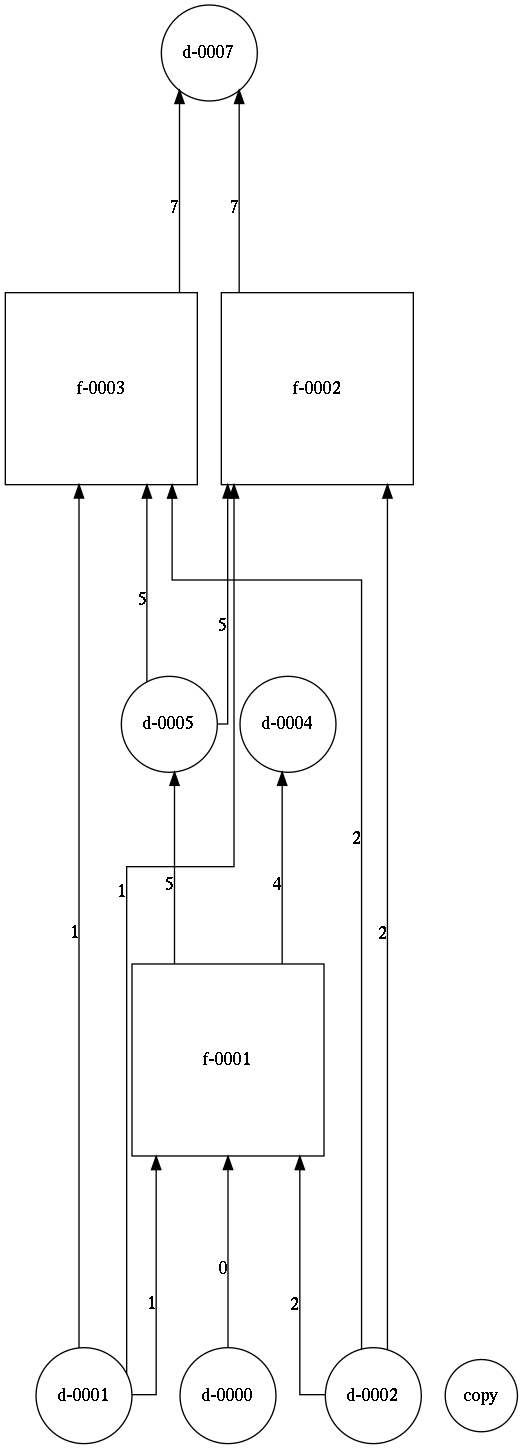

In [32]:
list(nx.topological_sort(G_chain))

['copy',
 'd-0002',
 'd-0001',
 'd-0000',
 'f-0001',
 'd-0005',
 'f-0003',
 'f-0002',
 'd-0007',
 'd-0004']

In [36]:
G = nx.line_graph(G_chain)

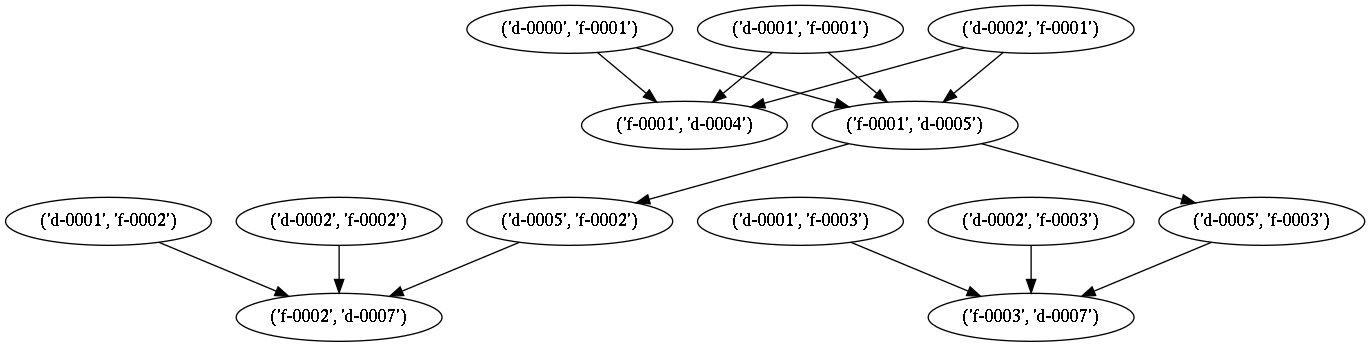

In [37]:
X = to_pydot(G)
with open("test.dot", "w") as text_file:
    print(X.to_string(), file=text_file)
    
!dot -T png test.dot > test.png  # Bash command

from IPython.display import Image, display
from IPython.core.display import HTML 

display(Image('test.png', unconfined=True))